# Elastic net - Feature Selection of enivronmental exposure variables
Here, we aim to find most important ACEs associated with internalizing and externalizing behavior problems (SDQ) and use it in a glm with and without pgs

In [62]:
set.seed(123)

In [63]:
pkgs = c(
    "ggplot2", "haven", "knitr", "psych", "devtools", "reshape2", "stats", "cluster", "dplyr", 
    "naniar", "lattice", "car", "corrplot", "naniar", "readxl", "foreign", "glmnet","caret",
    "sjPlot") 



for (i in pkgs) { # Load pkgs - install using R instead of Jupyter
   library(i, character.only = TRUE, quietly = TRUE)
 }


In [64]:
getwd()

[1] "/Users/drt65393/Documents/roc"

In [65]:
##DF with selectec variables (cleaned data - see in SampleSelection_ROC_102024)
#df <- read.csv("selvariableswithgenetics_roc_10092024.csv")
#dim(df)

#DF with all variables
all <- read.csv("allvariableswithgenetics_roc_122024.csv")
dim(all)

[1] 3440  320

In [66]:
# Step 1: Remove variables (columns) with >20% missing
df_clean = all[, colMeans(is.na(all)) <= 0.2, drop = FALSE]

# Step 2: Remove individuals (rows) with >20% missing
df_clean = df_clean[rowMeans(is.na(df_clean)) <= 0.2, ]

dim(df_clean)

[1] 3413  311

In [67]:
colnames(df_clean)

[1] "X"                     "idroc"                 "MOB"                  
  [4] "YOB"                   "YOB_mother"            "bl0time"              
  [7] "sex"                   "bl0childbirth"         "bl0igcapurro"         
 [10] "bl0apg1"               "bl0apg2"               "bl0apg3"              
 [13] "premature"             "bl0class2"             "bl0height1"           
 [16] "bl0weight1"            "bl0abdoper1"           "bl0cephper1"          
 [19] "bl0thorper1"           "bl0height2"            "bl0weight2"           
 [22] "bl0abdoper2"           "bl0cephper2"           "bl0thorper2"          
 [25] "bl0twin"               "bl0neigh"              "bl0child_skincolor"   
 [28] "bl0mom_skincolor"      "dint"                  "survey_type"          
 [31] "age_assessed"          "X00day"                "X00mo"                
 [34] "X00yr"                 "X02"                   "interviewer"          
 [37] "Q4day"                 "Q4mo"                  "Q4yr"                 
 [40] "dob"                   "Q5"                    "Q7"                   
 [43] "Q9"                    "Q10"                   "Q11"                  
 [46] "Q12"                   "Q13"                   "Q14"                  
 [49] "Q15"                   "Q16"                   "Q17"                  
 [52] "Q18"                   "Q19"                   "Q20"                  
 [55] "Q21"                   "Q22"                   "Q23"                  
 [58] "Q24"                   "Q25"                   "Q26"                  
 [61] "Q28"                   "Q29"                   "Q30"                  
 [64] "Q31"                   "Q32"                   "Q33"                  
 [67] "Q34"                   "Q35"                   "Q36"                  
 [70] "Q37"                   "Q38"                   "Q39"                  
 [73] "Q40"                   "Q41"                   "Q42"                  
 [76] "Q43"                   "Q44"                   "Q45"                  
 [79] "Q45a"                  "Q46"                   "Q47"                  
 [82] "Q49"                   "Q50"                   "Q51"                  
 [85] "Q52"                   "mother_height"         "Q53"                  
 [88] "mother_weight"         "Q54"                   "Q55"                  
 [91] "child_height"          "Q56"                   "child_weight"         
 [94] "Q57"                   "Q58"                   "Q59"                  
 [97] "Q60"                   "Q61"                   "Q62"                  
[100] "Q63"                   "Q64"                   "Q65"                  
[103] "Q66"                   "Q67"                   "Q68"                  
[106] "Q69"                   "Q70"                   "Q71"                  
[109] "Q72"                   "Q73"                   "Q74"                  
[112] "Q75"                   "Q76"                   "Q77"                  
[115] "Q78"                   "Q79"                   "Q80"                  
[118] "Q81"                   "Q82"                   "Q83"                  
[121] "Q85"                   "Q85a"                  "Q85b"                 
[124] "Q86"                   "Q87"                   "Q108"                 
[127] "Q108a"                 "Q109"                  "Q109a"                
[130] "Q110"                  "Q110a"                 "Q111"                 
[133] "Q112"                  "Q113"                  "Q114"                 
[136] "Q115"                  "Q116"                  "Q117"                 
[139] "Q187"                  "Q188"                  "Q189"                 
[142] "Q190"                  "Q191"                  "Q192"                 
[145] "Q193"                  "Q194"                  "Q195"                 
[148] "Q196"                  "Q197"                  "Q198"                 
[151] "Q199"                  "Q200"                  "Q201"                 
[154] "Q202"            

In [43]:
summary(df_clean$pebdtot); 
sd(na.omit(df_clean$pebdtot))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   4.000   8.000   9.232  13.000  36.000       4 

[1] 6.099453

In [68]:
head(df_clean$food_insecurity)

[1] 4 2 0 1 0 0

In [69]:
summary(df_clean$food_insecurity)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 0.0000  0.0000  0.0000  0.8911  2.0000  8.0000       6 

In [70]:
## Variables of interest

inter = c('sex','age_caregiver','edinburgh_score',
         'Q9','food_insecurity','MICS_stimulation',
         'discipline_nonviolent','discipline_phys_ass','discipline_psych_agg','discipline_severe',
         'sum_bhq','premature','bl0class2','bmiz06','stunted','obese','extern_problems', 'intern_problems')

In [71]:
all = dplyr::select(df_clean, all_of(inter))
dim(all)

[1] 3413   18

In [72]:
rownames(all) = df_clean$idroc
head(rownames(all))

[1] "1" "2" "4" "5" "6" "7"

In [73]:
## Remove missing for feature selection in elastic net
all = na.omit(all); dim(all) # 2812 INDV - 19 COLS
colnames(all)

[1] 2853   18

[1] "sex"                   "age_caregiver"         "edinburgh_score"      
 [4] "Q9"                    "food_insecurity"       "MICS_stimulation"     
 [7] "discipline_nonviolent" "discipline_phys_ass"   "discipline_psych_agg" 
[10] "discipline_severe"     "sum_bhq"               "premature"            
[13] "bl0class2"             "bmiz06"                "stunted"              
[16] "obese"                 "extern_problems"       "intern_problems"

In [74]:
table(all$premature)

(table(all$premature)/nrow(all))*100


   0    1 
2659  194 


       0        1 
93.20014  6.79986 

In [75]:
table(all$stunted)

(table(all$stunted)/nrow(all))*100


   0    1 
2361  492 


       0        1 
82.75499 17.24501 

In [76]:
table(all$bl0class2)

(table(all$bl0class2)/nrow(all))*100


   1    2 
2448  405 


       1        2 
85.80442 14.19558 

In [77]:
table(all$obese)

(table(all$obese)/nrow(all))*100


   0    1 
2310  543 


      0       1 
80.9674 19.0326 

In [78]:
library(dplyr)              # load it in your session
all = all %>%
  rename(
    edu_caregiver = Q9,
    weight_ga = bl0class2)


In [79]:
colnames(all)

[1] "sex"                   "age_caregiver"         "edinburgh_score"      
 [4] "edu_caregiver"         "food_insecurity"       "MICS_stimulation"     
 [7] "discipline_nonviolent" "discipline_phys_ass"   "discipline_psych_agg" 
[10] "discipline_severe"     "sum_bhq"               "premature"            
[13] "weight_ga"             "bmiz06"                "stunted"              
[16] "obese"                 "extern_problems"       "intern_problems"

In [80]:
table(all$edu_caregiver) #Caregiver highest grade completed 0 none, 1 elementary, 2 middle, 3 upper


   0    1    2    3 
 111 1113 1464  165 

In [81]:
round((table(all$edu_caregiver)/nrow(all))*100,2)


    0     1     2     3 
 3.89 39.01 51.31  5.78 

In [82]:
table(all$sex)


   0    1 
1403 1450 

In [83]:
all2 = all

In [84]:
head(rownames(all2))

[1] "1" "2" "4" "5" "6" "7"

In [85]:
all2$bmiz06 = NULL; all2$premature = NULL; all2$obese = NULL; all2$stunted = NULL; all2$weight_ga = NULL

# Elastic net reg for externalizing problems

In [86]:
Y = all2 %>%  dplyr::select(extern_problems) %>%  
     scale(center = TRUE, scale = FALSE) %>%  
     as.matrix() 

X <- all2 %>%  
     dplyr::select(-extern_problems, -intern_problems, -sex) %>%  
    as.matrix() 
  

In [87]:
colnames(X)

[1] "age_caregiver"         "edinburgh_score"       "edu_caregiver"        
 [4] "food_insecurity"       "MICS_stimulation"      "discipline_nonviolent"
 [7] "discipline_phys_ass"   "discipline_psych_agg"  "discipline_severe"    
[10] "sum_bhq"

In [88]:
library("caret")
# Model Building : Elastic Net Regression 5-fold cross-validation repeated 5 times with random hyperparameter values
control <- trainControl(method = "repeatedcv", 
                              number = 5, 
                              repeats = 5, 
                              search = "random") 

In [89]:
elastic_model <- train(extern_problems ~ ., 
                           data = cbind(X, Y), 
                           method = "glmnet", 
                           preProcess = c("center", "scale"), 
                           tuneLength = 25, 
                           trControl = control) 
  
elastic_model 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

2853 samples
  10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2283, 2283, 2281, 2283, 2282, 2283, ... 
Resampling results across tuning parameters:

  alpha       lambda       RMSE      Rsquared    MAE     
  0.06072057  1.166074668  3.801605  0.13765212  3.045438
  0.09104400  0.032191361  3.793001  0.13624608  3.030359
  0.14190691  0.008998105  3.793088  0.13621951  3.030269
  0.14229430  0.016199899  3.793081  0.13622299  3.030270
  0.15420230  0.086440694  3.792501  0.13643033  3.030869
  0.21976763  0.008939487  3.793087  0.13622155  3.030251
  0.30122890  1.605998986  3.891913  0.12748955  3.119163
  0.30772001  0.001949048  3.793086  0.13622320  3.030234
  0.31982062  0.008421538  3.793084  0.13622449  3.030234
  0.36948887  0.715864117  3.821990  0.13565218  3.060932
  0.40451028  1.939226267  3.983986  0.09831497  3.192787
  0.52113573  0.006962778  3.793062  0.13623455  3.030

In [90]:
# Best tuning parameters
elastic_model$bestTune  

,alpha,lambda
,<dbl>,<dbl>
20,0.7370777,0.05373419


In [91]:
# Coefficients of the final model
coef(elastic_model$finalModel, elastic_model$bestTune$lambda)

11 x 1 sparse Matrix of class "dgCMatrix"
                       s=0.05373419
(Intercept)           -1.449816e-15
age_caregiver         -4.869064e-02
edinburgh_score        3.230685e-01
edu_caregiver          .           
food_insecurity        9.574367e-02
MICS_stimulation      -6.102459e-01
discipline_nonviolent  .           
discipline_phys_ass    7.940441e-01
discipline_psych_agg   5.161392e-01
discipline_severe      3.938014e-02
sum_bhq                .           

glmnet variable importance

                      Overall
discipline_phys_ass   100.000
MICS_stimulation       76.853
discipline_psych_agg   65.001
edinburgh_score        40.686
food_insecurity        12.058
age_caregiver           6.132
discipline_severe       4.959
sum_bhq                 0.000
edu_caregiver           0.000
discipline_nonviolent   0.000


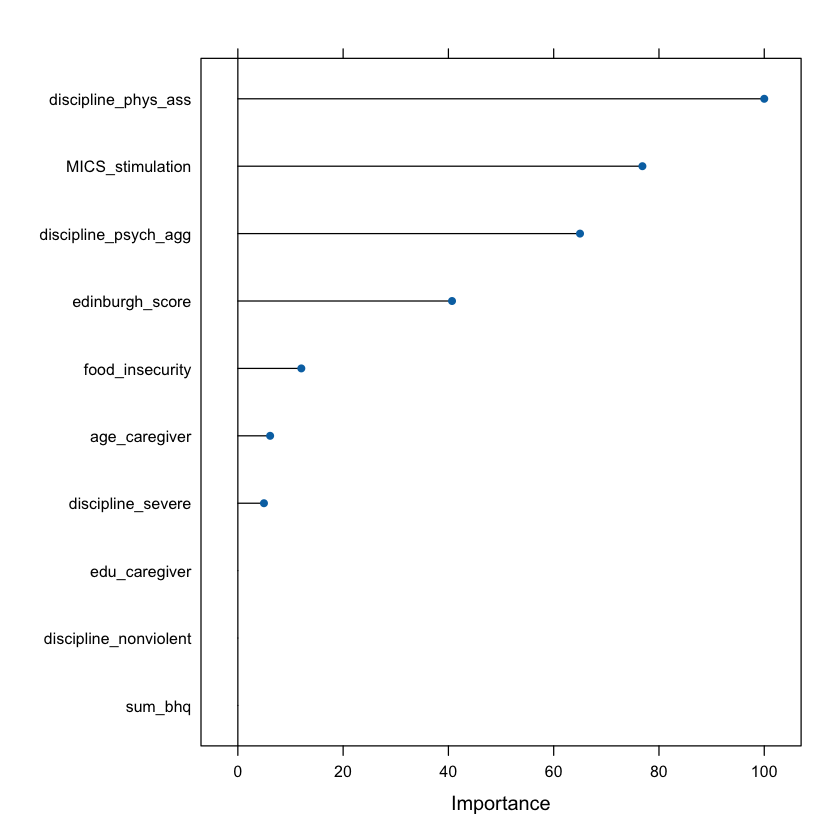

In [92]:
# Extract importance scores
importance <- varImp(elastic_model, scale = TRUE)

# Print results
print(importance)

# Plot results
plot(importance)


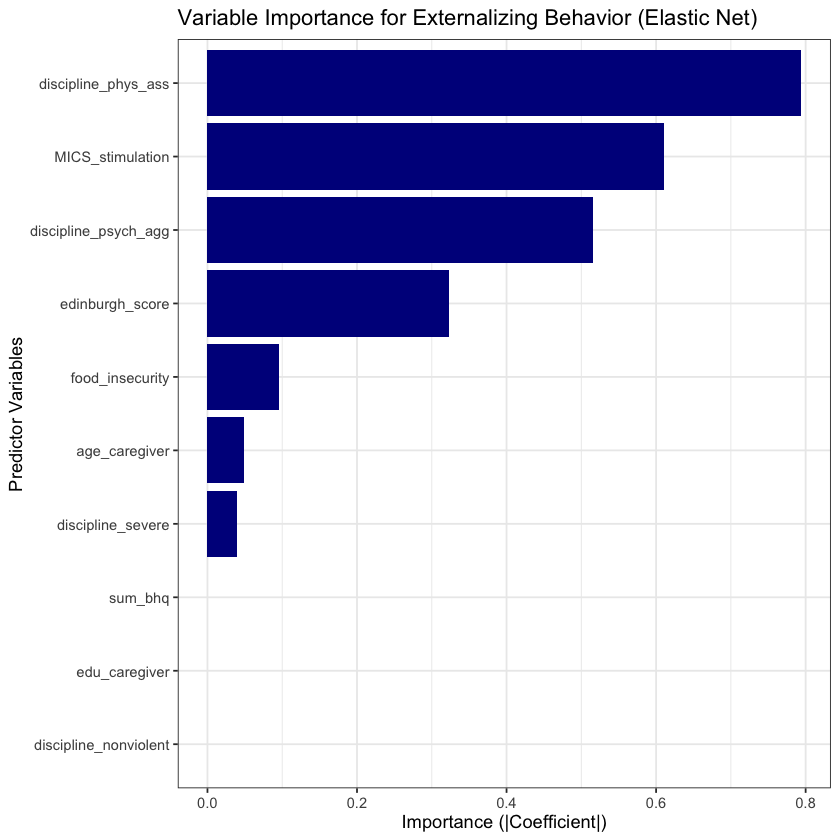

In [93]:
# Best lambda
best_lambda <- elastic_model$bestTune$lambda

# Coefficients
coef_df <- as.matrix(coef(elastic_model$finalModel, s = best_lambda))
coef_df <- data.frame(
  variable = rownames(coef_df),
  coefficient = coef_df[,1],
  row.names = NULL
)

# Remove intercept
coef_df <- coef_df %>% filter(variable != "(Intercept)")

# Add importance (absolute value)
coef_df <- coef_df %>%
  mutate(importance = abs(coefficient))

ggplot(coef_df, aes(x = reorder(variable, importance), y = importance)) +
  geom_col(fill = "darkblue") +
  coord_flip() +
  labs(title = "Variable Importance for Externalizing Behavior (Elastic Net)",
       x = "Predictor Variables",
       y = "Importance (|Coefficient|)") +
  theme_bw() + 
  theme(
    legend.title = element_text(size = 14, face = "bold", color = "black"),
    legend.text  = element_text(size = 12, color = "black")
  )


In [94]:
# Model Prediction 
data_used <- data.frame(Y, X)   # Combine into one dataset
dim(data_used)

# Predictions on the same data
preds <- predict(elastic_model, newdata = data_used)

# True outcome
obs <- data_used$extern_problems

# R², RMSE, MAE
print(postResample(preds, obs))

[1] 2853   11

     RMSE  Rsquared       MAE 
3.7807951 0.1407283 3.0225374 


# Elastic net for internalizing problems

In [95]:
Y_int = all2 %>%  dplyr::select(intern_problems) %>%  
     scale(center = TRUE, scale = FALSE) %>%  
     as.matrix() 

In [96]:
colnames(Y_int); colnames(X)

[1] "intern_problems"

[1] "age_caregiver"         "edinburgh_score"       "edu_caregiver"        
 [4] "food_insecurity"       "MICS_stimulation"      "discipline_nonviolent"
 [7] "discipline_phys_ass"   "discipline_psych_agg"  "discipline_severe"    
[10] "sum_bhq"

In [97]:
# Model Building : Elastic Net Regression 5-fold cross-validation repeated 5 times with random hyperparameter values
elastic_model_int <- train(intern_problems ~ ., 
                           data = cbind(X, Y_int), 
                           method = "glmnet", 
                           preProcess = c("center", "scale"), 
                           tuneLength = 25, 
                           trControl = control) 
  
elastic_model_int 

# Coefficients of the final model
coef(elastic_model_int$finalModel, elastic_model_int$bestTune$lambda)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


glmnet 

2853 samples
  10 predictor

Pre-processing: centered (10), scaled (10) 
Resampling: Cross-Validated (5 fold, repeated 5 times) 
Summary of sample sizes: 2282, 2282, 2283, 2283, 2282, 2282, ... 
Resampling results across tuning parameters:

  alpha       lambda       RMSE      Rsquared    MAE     
  0.08088045  5.637562542  2.978610  0.04354410  2.340976
  0.10054511  0.551117104  2.902267  0.05810067  2.275716
  0.11167496  1.196250381  2.914609  0.05720731  2.286887
  0.14599968  0.001007245  2.899571  0.05893590  2.270162
  0.19210261  0.004543175  2.899580  0.05893055  2.270163
  0.21425453  0.822650733  2.919540  0.05525299  2.290817
  0.22469499  0.087892018  2.899338  0.05873775  2.271022
  0.27140368  0.036554691  2.899380  0.05884677  2.270488
  0.36974506  0.007413896  2.899571  0.05891245  2.270202
  0.39989394  0.104539162  2.900444  0.05814316  2.272482
  0.41278892  0.006065877  2.899583  0.05891389  2.270193
  0.43080279  0.255063494  2.906181  0.05712829  2.278

11 x 1 sparse Matrix of class "dgCMatrix"
                       s=0.08789202
(Intercept)           -2.527037e-16
age_caregiver         -6.810993e-02
edinburgh_score        3.840339e-01
edu_caregiver          2.297751e-02
food_insecurity        5.009175e-02
MICS_stimulation      -1.765642e-01
discipline_nonviolent  1.861020e-01
discipline_phys_ass    2.322394e-01
discipline_psych_agg   9.837666e-02
discipline_severe      1.926527e-01
sum_bhq                8.132561e-02

glmnet variable importance

                      Overall
edinburgh_score        100.00
discipline_phys_ass     57.96
discipline_severe       46.99
discipline_nonviolent   45.18
MICS_stimulation        42.54
discipline_psych_agg    20.88
sum_bhq                 16.16
age_caregiver           12.50
food_insecurity          7.51
edu_caregiver            0.00


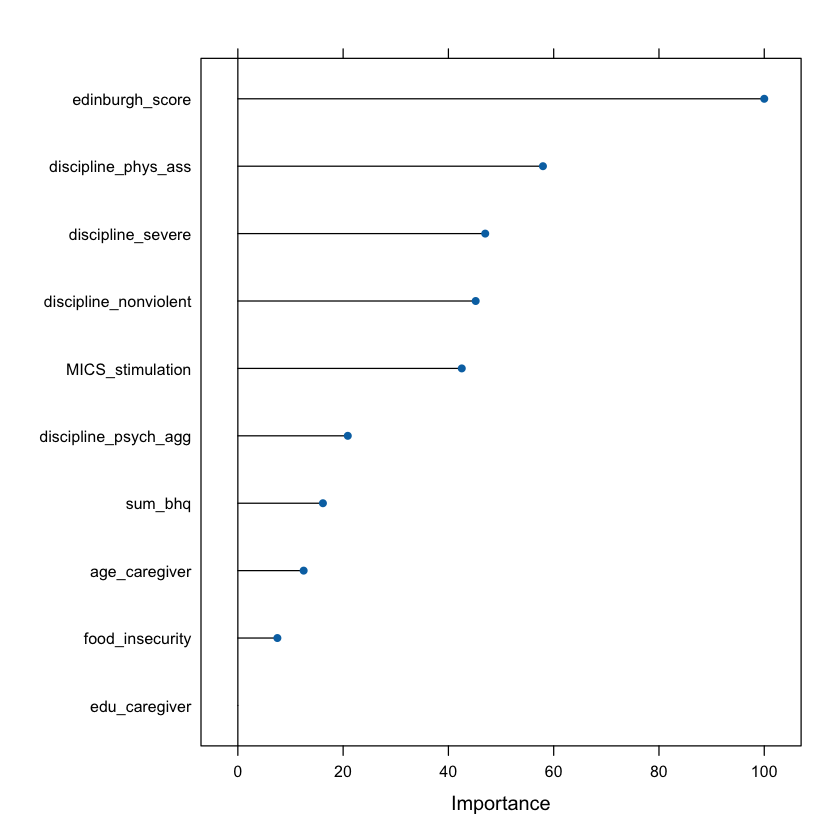

In [98]:
# Extract importance scores
importance_int <- varImp(elastic_model_int, scale = TRUE)

# Print results
print(importance_int)

# Plot results
plot(importance_int)

In [99]:
# Best lambda
best_lambda_int <- elastic_model_int$bestTune$lambda

In [100]:
# Coefficients
coef_df_int <- as.matrix(coef(elastic_model_int$finalModel, s = best_lambda_int))
coef_df_int <- data.frame(
  variable = rownames(coef_df_int),
  coefficient = coef_df_int[,1],
  row.names = NULL
)

In [101]:
# Remove intercept
coef_df_int <- coef_df_int %>% filter(variable != "(Intercept)")

# Add importance (absolute value)
coef_df_int <- coef_df_int %>%
  mutate(importance = abs(coefficient))

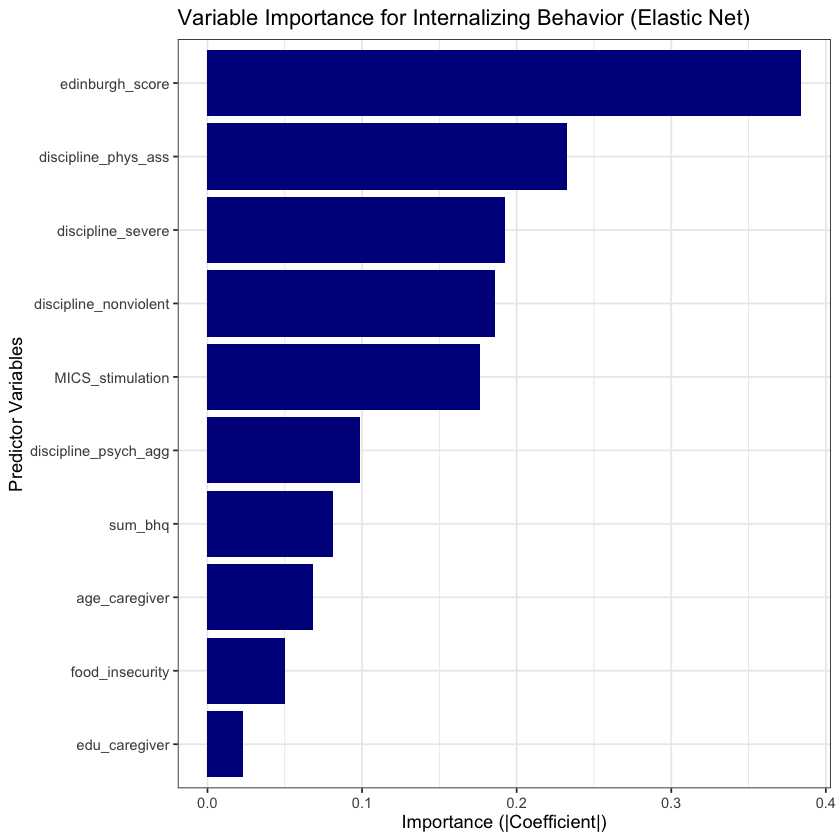

In [102]:
ggplot(coef_df_int, aes(x = reorder(variable, importance), y = importance)) +
  geom_col(fill = "darkblue") +
  coord_flip() +
  labs(title = "Variable Importance for Internalizing Behavior (Elastic Net)",
       x = "Predictor Variables",
       y = "Importance (|Coefficient|)") +
  theme_bw() + 
  theme(
    legend.title = element_text(size = 14, face = "bold", color = "black"),
    legend.text  = element_text(size = 12, color = "black")
  )

In [103]:
# Model Prediction 
data_used_int <- data.frame(Y_int, X)   # Combine into one dataset
dim(data_used_int)

# Predictions on the same data
preds <- predict(elastic_model_int, newdata = data_used_int)

[1] 2853   11

In [104]:
colnames(data_used_int)

[1] "intern_problems"       "age_caregiver"         "edinburgh_score"      
 [4] "edu_caregiver"         "food_insecurity"       "MICS_stimulation"     
 [7] "discipline_nonviolent" "discipline_phys_ass"   "discipline_psych_agg" 
[10] "discipline_severe"     "sum_bhq"

In [105]:
# True outcome
obs <- data_used_int$intern_problems

# R², RMSE, MAE
print(postResample(preds, obs))


      RMSE   Rsquared        MAE 
2.88573318 0.06654534 2.26133179 


In [106]:
coef_df = coef_df %>%
dplyr::mutate(importance = abs(coefficient),
                outcome = "Externalizing")

In [107]:
coef_df_int = coef_df_int %>%
dplyr::mutate(importance = abs(coefficient),
                outcome = "Internalizing")

In [108]:
coef_both <- bind_rows(coef_df, coef_df_int)

In [109]:
coef_df

variable,coefficient,importance,outcome
<chr>,<dbl>,<dbl>,<chr>
age_caregiver,-0.04869064,0.04869064,Externalizing
edinburgh_score,0.32306846,0.32306846,Externalizing
edu_caregiver,0.00000000,0.00000000,Externalizing
food_insecurity,0.09574367,0.09574367,Externalizing
MICS_stimulation,-0.61024592,0.61024592,Externalizing
discipline_nonviolent,0.00000000,0.00000000,Externalizing
discipline_phys_ass,0.79404405,0.79404405,Externalizing
discipline_psych_agg,0.51613920,0.51613920,Externalizing
discipline_severe,0.03938014,0.03938014,Externalizing


In [110]:
coef_df_int

variable,coefficient,importance,outcome
<chr>,<dbl>,<dbl>,<chr>
age_caregiver,-0.06810993,0.06810993,Internalizing
edinburgh_score,0.38403388,0.38403388,Internalizing
edu_caregiver,0.02297751,0.02297751,Internalizing
food_insecurity,0.05009175,0.05009175,Internalizing
MICS_stimulation,-0.17656416,0.17656416,Internalizing
discipline_nonviolent,0.18610201,0.18610201,Internalizing
discipline_phys_ass,0.23223939,0.23223939,Internalizing
discipline_psych_agg,0.09837666,0.09837666,Internalizing
discipline_severe,0.19265270,0.19265270,Internalizing


In [111]:
coef_df_ext = coef_df

In [112]:
# R² of models (cross-validation)
r2_int <- round(getTrainPerf(elastic_model_int)$TrainRsquared, 2)
r2_ext <- round(getTrainPerf(elastic_model)$TrainRsquared, 2)

In [113]:
var_labels <- c(
  discipline_phys_ass = "Parenting with Physical Assault",
  discipline_psych_agg = "Parenting with Psychological Aggression",
  discipline_severe = "Parenting with Severe Discipline",
  discipline_nonviolent = "Positive parenting",
  MICS_stimulation = "MICS Stimulation",
  edinburgh_score = "Maternal depression (EPDS)",
  food_insecurity = "Food Insecurity",
  age_caregiver = "Caregiver age",
  #fragile_family_score = "Fragile Family Score",
  sum_bhq = "Broken Homes Questionnaire",
  edu_caregiver = "Caregiver Education"
  #sex = "Child sex",
  #premature = "Prematurity",
  #weight_ga = "BW/GA",
  #bmiz06 = "BMI/age at 3yo",
  #stunted = "Stunting at 3yo",
  #obese = "Obesity at 3yo",
)

In [114]:
head(coef_df_ext)

,variable,coefficient,importance,outcome
,<chr>,<dbl>,<dbl>,<chr>
1,age_caregiver,-0.04869064,0.04869064,Externalizing
2,edinburgh_score,0.32306846,0.32306846,Externalizing
3,edu_caregiver,0.00000000,0.00000000,Externalizing
4,food_insecurity,0.09574367,0.09574367,Externalizing
5,MICS_stimulation,-0.61024592,0.61024592,Externalizing
6,discipline_nonviolent,0.00000000,0.00000000,Externalizing


In [115]:
# Merge importance from both models
library(dplyr)

coef_wide <- full_join(coef_df_int %>% 
dplyr::select(variable, coef_df_ext = importance), 
coef_df_ext %>% dplyr::select(variable, coef_df_int = importance), by = "variable" )

In [116]:
head(coef_wide)

,variable,coef_df_ext,coef_df_int
,<chr>,<dbl>,<dbl>
1,age_caregiver,0.06810993,0.04869064
2,edinburgh_score,0.38403388,0.32306846
3,edu_caregiver,0.02297751,0.00000000
4,food_insecurity,0.05009175,0.09574367
5,MICS_stimulation,0.17656416,0.61024592
6,discipline_nonviolent,0.18610201,0.00000000


In [117]:
# Gather into long format for plotting
coef_long <- coef_wide %>%
  tidyr::pivot_longer(cols = c(coef_df_int, coef_df_ext),
               names_to = "outcome", values_to = "importance") %>%
  dplyr::mutate(
    importance = ifelse(outcome == "coef_df_int", -importance, importance),
    outcome = ifelse(outcome == "coef_df_int", "Internalizing", "Externalizing")
  )

In [118]:
head(coef_long)

variable,outcome,importance
<chr>,<chr>,<dbl>
age_caregiver,Internalizing,-0.04869064
age_caregiver,Externalizing,0.06810993
edinburgh_score,Internalizing,-0.32306846
edinburgh_score,Externalizing,0.38403388
edu_caregiver,Internalizing,0.00000000
edu_caregiver,Externalizing,0.02297751


In [119]:
coef_long <- coef_long %>%
  dplyr::mutate(
    variable = dplyr::recode(variable, !!!var_labels, .default = variable)
  )

In [120]:
coef_long <- coef_long %>%
  dplyr::mutate(outcome = factor(outcome, levels = c("Internalizing", "Externalizing")))
head(coef_long)

variable,outcome,importance
<chr>,<fct>,<dbl>
Caregiver age,Internalizing,-0.04869064
Caregiver age,Externalizing,0.06810993
Maternal depression (EPDS),Internalizing,-0.32306846
Maternal depression (EPDS),Externalizing,0.38403388
Caregiver Education,Internalizing,0.00000000
Caregiver Education,Externalizing,0.02297751


In [121]:
r2_int

[1] 0.06

In [122]:
r2_ext

[1] 0.14

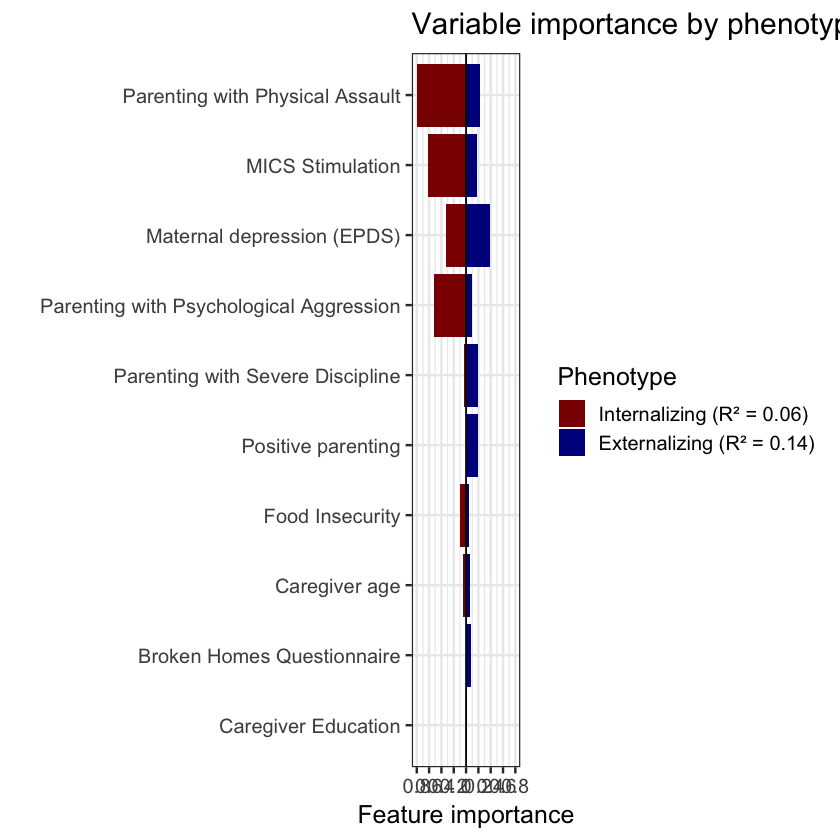

In [123]:
  ggplot(coef_long, aes(x = importance, y = reorder(variable, abs(importance)), fill = outcome)) +
  geom_col() +
  geom_vline(xintercept = 0, color = "black") +
  labs(title = "Variable importance by phenotype (elastic net model)",
       x = "Feature importance",
       y = "",
       fill = "Phenotype") +
  scale_fill_manual(values = c("Internalizing" = "darkred", 
                               "Externalizing" = "darkblue"),
                    labels = c(
      paste0("Internalizing (R² = ", r2_int, ")"),
      paste0("Externalizing (R² = ", r2_ext, ")")
    )) +
 scale_x_continuous(labels = abs, limits = c(-0.8, 0.8), breaks = seq(-0.8, 0.8, by = 0.2)) +   # <<< remove sinal no eixo
  theme_bw(base_size = 15) 

  ggsave("/Users/drt65393/Documents/Doc/TESE/figuras/var_importancia3.png", width = 10, height = 8, dpi = 300)

In [124]:
head(coef_long)

variable,outcome,importance
<chr>,<fct>,<dbl>
Caregiver age,Internalizing,-0.04869064
Caregiver age,Externalizing,0.06810993
Maternal depression (EPDS),Internalizing,-0.32306846
Maternal depression (EPDS),Externalizing,0.38403388
Caregiver Education,Internalizing,0.00000000
Caregiver Education,Externalizing,0.02297751


In [125]:
head(coef_wide)

,variable,coef_df_ext,coef_df_int
,<chr>,<dbl>,<dbl>
1,age_caregiver,0.06810993,0.04869064
2,edinburgh_score,0.38403388,0.32306846
3,edu_caregiver,0.02297751,0.00000000
4,food_insecurity,0.05009175,0.09574367
5,MICS_stimulation,0.17656416,0.61024592
6,discipline_nonviolent,0.18610201,0.00000000


In [126]:
# Extrair R²
r2_int <- round(getTrainPerf(elastic_model_int)$TrainRsquared, 2)
r2_ext <- round(getTrainPerf(elastic_model)$TrainRsquared, 2)

In [127]:
# Preparar dados
coef_long2 <- coef_wide %>%
  tidyr::pivot_longer(cols = c(coef_df_int, coef_df_ext),
               names_to = "outcome", values_to = "importance") %>%
  mutate(
    outcome = ifelse(outcome == "coef_df_int", "Internalizing", "Externalizing"),
    facet_label = ifelse(outcome == "Internalizing",
                         paste0("Internalizing (R² = ", r2_int, ")"),
                         paste0("Externalizing (R² = ", r2_ext, ")"))
  ) %>%
  dplyr::mutate(
    variable = dplyr::recode(variable, !!!var_labels, .default = variable)
  )

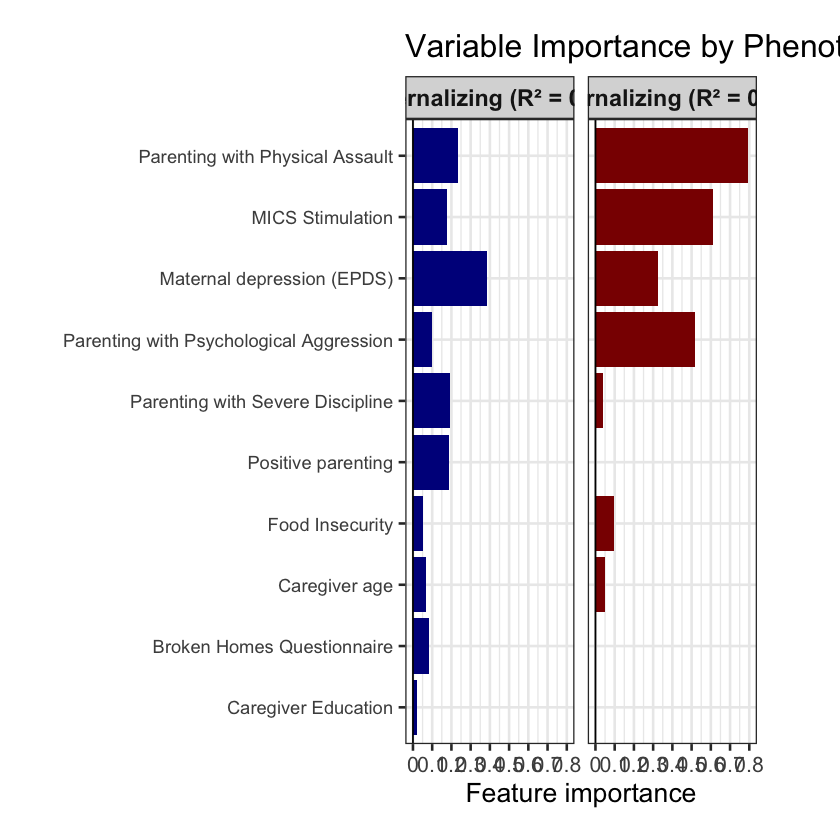

In [128]:

# Plot
ggplot(coef_long2, aes(x = importance,
                       y = reorder(variable, abs(importance)),
                       fill = outcome)) +
  geom_col(show.legend = FALSE) +
  geom_vline(xintercept = 0, color = "black") +
  facet_wrap(~ facet_label, ncol = 2, scales = "fixed") +   # usar facet_label
  labs(title = "Variable Importance by Phenotype (Elastic Net)",
       x = "Feature importance",
       y = "") +
  scale_fill_manual(values = c("Internalizing" = "darkred",
                               "Externalizing" = "darkblue")) +
  scale_x_continuous(labels = abs,
                     limits = c(0, 0.8),
                     breaks = seq(0, 0.8, by = 0.1)) +
  theme_bw(base_size = 16) +
  theme(
    strip.text = element_text(size = 14, face = "bold"),
    axis.text.y = element_text(size = 11),
    plot.margin = margin(20, 50, 20, 20)
  )

ggsave("/Users/drt65393/Documents/Doc/TESE/figuras/var_importancia_panel3.png", width = 10, height = 8, dpi = 300)


#### Regression analysis based on feature importance

In [129]:
dim(all2)

[1] 2853   13

In [130]:
head(coef_df); unique(coef_df$outcome)

,variable,coefficient,importance,outcome
,<chr>,<dbl>,<dbl>,<chr>
1,age_caregiver,-0.04869064,0.04869064,Externalizing
2,edinburgh_score,0.32306846,0.32306846,Externalizing
3,edu_caregiver,0.00000000,0.00000000,Externalizing
4,food_insecurity,0.09574367,0.09574367,Externalizing
5,MICS_stimulation,-0.61024592,0.61024592,Externalizing
6,discipline_nonviolent,0.00000000,0.00000000,Externalizing


[1] "Externalizing"

In [131]:
# Selecting only variables with feature importance > 0 in elastic net for externalizing behavior
selected_vars <- coef_df %>%
  filter(importance > 0) %>%
  pull(variable)
selected_vars

[1] "age_caregiver"        "edinburgh_score"      "food_insecurity"     
[4] "MICS_stimulation"     "discipline_phys_ass"  "discipline_psych_agg"
[7] "discipline_severe"

In [132]:
colnames(all)

[1] "sex"                   "age_caregiver"         "edinburgh_score"      
 [4] "edu_caregiver"         "food_insecurity"       "MICS_stimulation"     
 [7] "discipline_nonviolent" "discipline_phys_ass"   "discipline_psych_agg" 
[10] "discipline_severe"     "sum_bhq"               "premature"            
[13] "weight_ga"             "bmiz06"                "stunted"              
[16] "obese"                 "extern_problems"       "intern_problems"

In [133]:
data_reduced_ext <- all %>%
  dplyr::select(extern_problems, all_of(selected_vars), sex, premature, weight_ga) # birth variables will be included as covariates in final model

In [134]:
dim(data_reduced_ext); dim(na.omit(data_reduced_ext))

[1] 2853   11

[1] 2853   11

In [135]:
colnames(data_reduced_ext)

[1] "extern_problems"      "age_caregiver"        "edinburgh_score"     
 [4] "food_insecurity"      "MICS_stimulation"     "discipline_phys_ass" 
 [7] "discipline_psych_agg" "discipline_severe"    "sex"                 
[10] "premature"            "weight_ga"

In [136]:
library(MASS)
library(rcompanion)


Anexando pacote: ‘MASS’


O seguinte objeto é mascarado por ‘package:dplyr’:

    select



Anexando pacote: ‘rcompanion’


O seguinte objeto é mascarado por ‘package:psych’:

    phi




In [137]:
fit <- glm.nb(extern_problems ~ ., data = data_reduced_ext) # fit regression model  
summary(fit)


Call:
glm.nb(formula = extern_problems ~ ., data = data_reduced_ext, 
    init.theta = 3.98248248, link = log)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.898232   0.086531  21.937  < 2e-16 ***
age_caregiver        -0.002376   0.001926  -1.234   0.2174    
edinburgh_score       0.010683   0.002393   4.464 8.04e-06 ***
food_insecurity       0.011971   0.007767   1.541   0.1233    
MICS_stimulation     -0.073334   0.008859  -8.278  < 2e-16 ***
discipline_phys_ass   0.117207   0.013481   8.694  < 2e-16 ***
discipline_psych_agg  0.166045   0.024515   6.773 1.26e-11 ***
discipline_severe     0.037326   0.115069   0.324   0.7457    
sex                  -0.046357   0.024373  -1.902   0.0572 .  
premature            -0.058666   0.049039  -1.196   0.2316    
weight_ga             0.031541   0.034811   0.906   0.3649    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative Binomial(3.982

In [138]:
var_labels

discipline_phys_ass 
        "Parenting with Physical Assault" 
                     discipline_psych_agg 
"Parenting with Psychological Aggression" 
                        discipline_severe 
       "Parenting with Severe Discipline" 
                    discipline_nonviolent 
                     "Positive parenting" 
                         MICS_stimulation 
                       "MICS Stimulation" 
                          edinburgh_score 
             "Maternal depression (EPDS)" 
                          food_insecurity 
                        "Food Insecurity" 
                            age_caregiver 
                          "Caregiver age" 
                                  sum_bhq 
             "Broken Homes Questionnaire" 
                            edu_caregiver 
                    "Caregiver Education"

In [139]:
sjPlot::tab_model(fit, 
    pred.labels = c("Intercept", "Caregiver Age", "Maternal depression (EPDS)", 
    "Food Insecurity", "MICS Stimulation", "Parenting with Physical Assault", 
    "Parenting with Psychological Aggression", "Parenting with Severe Discipline", 
    "Sex", "Prematurity", "Weight for GA"),
    dv.labels = "Externalizing problems",
    file = "/Users/drt65393/Documents/Doc/TESE/tabelas/env_externalizing_all.html")

In [140]:
coef_df_int

variable,coefficient,importance,outcome
<chr>,<dbl>,<dbl>,<chr>
age_caregiver,-0.06810993,0.06810993,Internalizing
edinburgh_score,0.38403388,0.38403388,Internalizing
edu_caregiver,0.02297751,0.02297751,Internalizing
food_insecurity,0.05009175,0.05009175,Internalizing
MICS_stimulation,-0.17656416,0.17656416,Internalizing
discipline_nonviolent,0.18610201,0.18610201,Internalizing
discipline_phys_ass,0.23223939,0.23223939,Internalizing
discipline_psych_agg,0.09837666,0.09837666,Internalizing
discipline_severe,0.19265270,0.19265270,Internalizing


In [141]:
selected_vars_int <- coef_df_int %>%
  filter(importance > 0) %>%
  pull(variable)
selected_vars_int

[1] "age_caregiver"         "edinburgh_score"       "edu_caregiver"        
 [4] "food_insecurity"       "MICS_stimulation"      "discipline_nonviolent"
 [7] "discipline_phys_ass"   "discipline_psych_agg"  "discipline_severe"    
[10] "sum_bhq"

In [142]:
data_reduced_int <- all %>%
  dplyr::select(intern_problems, all_of(selected_vars_int), sex, premature, weight_ga) # birth variables will be included as covariates in final model

In [143]:
dim(data_reduced_int)

[1] 2853   14

In [144]:
dim(na.omit(data_reduced_int)); dim(na.omit(data_reduced_ext))

[1] 2853   14

[1] 2853   11

In [145]:
fit2 <- glm.nb(intern_problems ~ ., data = data_reduced_int) # fit regression model  
summary(fit2)


Call:
glm.nb(formula = intern_problems ~ ., data = data_reduced_int, 
    init.theta = 1.721607773, link = log)

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.8425409  0.1553077   5.425 5.80e-08 ***
age_caregiver         -0.0047827  0.0028357  -1.687 0.091675 .  
edinburgh_score        0.0239592  0.0035171   6.812 9.62e-12 ***
edu_caregiver          0.0285391  0.0278123   1.026 0.304830    
food_insecurity        0.0120315  0.0115307   1.043 0.296750    
MICS_stimulation      -0.0501985  0.0131829  -3.808 0.000140 ***
discipline_nonviolent  0.0770622  0.0222067   3.470 0.000520 ***
discipline_phys_ass    0.0704724  0.0205155   3.435 0.000592 ***
discipline_psych_agg   0.0708187  0.0361639   1.958 0.050198 .  
discipline_severe      0.3392433  0.1672409   2.028 0.042512 *  
sum_bhq                0.0108492  0.0054701   1.983 0.047325 *  
sex                   -0.0143898  0.0357349  -0.403 0.687182    
premature             -0.00

In [146]:
sjPlot::tab_model(fit2, 
    pred.labels = c("Intercept", "Caregiver Age", "Maternal depression (EPDS)", 
    "Caregiver Education","Food Insecurity", 
    "MICS Stimulation", "Positive parenting",
    "Parenting with Physical Assault", "Parenting with Psychological Aggression", 
    "Parenting with Severe Discipline", "Broken Homes Questionnaire",
    "Sex", "Prematurity", "Weight for GA"),
    dv.labels = "Internalizing problems",
    file = "/Users/drt65393/Documents/Doc/TESE/tabelas/env_internalizing_all.html") 

### Compare the samples

In [147]:
dim(all)

[1] 2853   18

In [148]:
colnames(all)
head(rownames(all))

[1] "sex"                   "age_caregiver"         "edinburgh_score"      
 [4] "edu_caregiver"         "food_insecurity"       "MICS_stimulation"     
 [7] "discipline_nonviolent" "discipline_phys_ass"   "discipline_psych_agg" 
[10] "discipline_severe"     "sum_bhq"               "premature"            
[13] "weight_ga"             "bmiz06"                "stunted"              
[16] "obese"                 "extern_problems"       "intern_problems"

[1] "1" "2" "4" "5" "6" "7"

In [151]:
library(compareGroups)

res = compareGroups(dna ~ ., data = x)
tab = createTable(res)
tab

ERROR: Error: objeto 'x' não encontrado


In [622]:
export2html(tab, file = "/Users/drt65393/Documents/Doc/TESE/tabelas/compareGroups_summary.html")
export2latex(tab, file = "/Users/drt65393/Documents/Doc/TESE/tabelas/compareGroups_summary.tex")

## Include multiPGS in the model (G+E model)

In [152]:
pgs = read.delim("/Users/drt65393/Documents/roc/roc_paper_2024/05_2025_pgscalc_analysis/score/08_2025_roc_with_pgs.tsv",
     sep = "\t")

In [153]:
head(pgs)

,sample,ID,sex,pemotion,pconduct,phyper,ppeer,pprosoc,pebdtot,externalising,⋯,PGS002738_alcohol_dep,PGS002786_BD,PGS003358_smoking,PGS003724_IQ,PGS003753_ADHD,PGS004521_Anxiety_disorder,PGS_Int,PGS_Ext,multi_pgs_ext,multi_pgs_int
,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,206182310135_R01C01,266,female,3,1,3,3,10,10,4,⋯,0.2816256,1.61194200,0.20220784,0.6495411,0.9335897,0.7683924,0.08915865,-0.07948094,-0.31647288,-0.14848744
2,206182310135_R02C01,1337,female,2,0,2,0,10,4,2,⋯,-1.8294617,0.27373289,-0.06071188,-2.3025308,-1.3664342,2.4419432,0.27126052,0.05753460,-0.14429497,-0.17714125
3,206182310135_R04C01,6257,female,4,7,6,4,4,21,13,⋯,-1.8803174,-0.86537592,1.03873388,2.0920458,0.3938854,-1.0834491,-0.05197157,-0.04599166,0.03485716,0.12690850
4,206182310135_R05C01,52,female,0,0,0,2,10,2,0,⋯,-0.5437400,1.59162087,-0.13140753,-0.9153862,1.6923068,-0.1407761,-0.02193859,-0.05702520,-0.27079812,-0.21313336
5,206182310135_R07C01,3374,male,1,3,3,0,8,7,6,⋯,-0.8423609,-1.10974378,-2.86846734,0.4760312,0.2809325,1.0280763,-0.03595845,-0.02910183,0.18315659,0.06455441
6,206182320002_R01C01,3340,female,5,0,2,0,10,7,2,⋯,-0.8935329,0.01464477,0.61134053,0.2379913,-1.2956117,-1.0592156,0.13505695,-0.12455334,-0.09378261,-0.11589446


In [154]:
df_clean = df_clean %>%
  rename(
    edu_caregiver = Q9,
    weight_ga = bl0class2)

In [155]:
data_int = df_clean %>%
  dplyr::select(idroc, intern_problems, all_of(selected_vars_int), sex, premature, weight_ga) # birth variables will be included as covariates in final model with DNA

In [156]:
data_ext = df_clean %>%
  dplyr::select(idroc, extern_problems, all_of(selected_vars), sex, premature, weight_ga) # birth variables will be included as covariates in final model with DNA

In [157]:
pgs_ext = pgs[, c("ID", "multi_pgs_ext")]
colnames(pgs_ext)[1] = "idroc"

In [158]:
pgs_int = pgs[, c("ID", "multi_pgs_int")]
colnames(pgs_int)[1] = "idroc"

In [159]:
sum(pgs_int$idroc %in% data_int$idroc)

[1] 358

In [160]:
data_dna_int = merge(data_int, pgs_int, by = "idroc", all.y=TRUE)

In [161]:
dim(data_dna_int); dim(na.omit(data_dna_int))

[1] 381  16

[1] 314  16

In [162]:
data_dna_ext = merge(data_ext, pgs_ext, by = "idroc", all.y=TRUE)

In [163]:
dim(data_dna_ext); dim(na.omit(data_dna_ext))

[1] 381  13

[1] 337  13

In [164]:
colnames(data_dna_ext)

[1] "idroc"                "extern_problems"      "age_caregiver"       
 [4] "edinburgh_score"      "food_insecurity"      "MICS_stimulation"    
 [7] "discipline_phys_ass"  "discipline_psych_agg" "discipline_severe"   
[10] "sex"                  "premature"            "weight_ga"           
[13] "multi_pgs_ext"

In [165]:
colnames(data_dna_int)

[1] "idroc"                 "intern_problems"       "age_caregiver"        
 [4] "edinburgh_score"       "edu_caregiver"         "food_insecurity"      
 [7] "MICS_stimulation"      "discipline_nonviolent" "discipline_phys_ass"  
[10] "discipline_psych_agg"  "discipline_severe"     "sum_bhq"              
[13] "sex"                   "premature"             "weight_ga"            
[16] "multi_pgs_int"

In [166]:
rownames(data_dna_ext) = data_dna_ext$idroc
data_dna_ext$idroc = NULL

In [167]:
rownames(data_dna_int) = data_dna_int$idroc
data_dna_int$idroc = NULL

In [168]:
dim(data_dna_ext); dim(na.omit(data_dna_ext))

data_dna_ext = na.omit(data_dna_ext)

[1] 381  12

[1] 337  12

In [169]:
dim(data_dna_int); dim(na.omit(data_dna_int))

data_dna_int = na.omit(data_dna_int)

[1] 381  15

[1] 314  15

In [170]:
fit_dna <- glm.nb(extern_problems ~ ., data = data_dna_ext) # fit regression model  
summary(fit_dna)


Call:
glm.nb(formula = extern_problems ~ ., data = data_dna_ext, init.theta = 4.22074592, 
    link = log)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.929294   0.266782   7.232 4.77e-13 ***
age_caregiver        -0.003296   0.005678  -0.581  0.56157    
edinburgh_score       0.004406   0.007724   0.570  0.56840    
food_insecurity       0.059998   0.026126   2.297  0.02165 *  
MICS_stimulation     -0.064153   0.025199  -2.546  0.01090 *  
discipline_phys_ass   0.114516   0.037961   3.017  0.00256 ** 
discipline_psych_agg  0.130837   0.070428   1.858  0.06320 .  
discipline_severe    -0.233230   0.363680  -0.641  0.52133    
sex                  -0.087060   0.071326  -1.221  0.22224    
premature             0.019833   0.096038   0.207  0.83639    
weight_ga             0.026037   0.076431   0.341  0.73336    
multi_pgs_ext         0.572054   0.131657   4.345 1.39e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0

In [171]:
fit <- glm.nb(extern_problems ~ . -multi_pgs_ext, data = data_dna_ext) # fit regression model  
summary(fit)


Call:
glm.nb(formula = extern_problems ~ . - multi_pgs_ext, data = data_dna_ext, 
    init.theta = 3.770592054, link = log)

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)           1.856341   0.275393   6.741 1.58e-11 ***
age_caregiver        -0.003071   0.005856  -0.524  0.60005    
edinburgh_score       0.004847   0.007993   0.606  0.54427    
food_insecurity       0.064988   0.027031   2.404  0.01621 *  
MICS_stimulation     -0.060963   0.026020  -2.343  0.01913 *  
discipline_phys_ass   0.125488   0.039301   3.193  0.00141 ** 
discipline_psych_agg  0.144284   0.072835   1.981  0.04759 *  
discipline_severe    -0.122988   0.373620  -0.329  0.74202    
sex                  -0.060748   0.073190  -0.830  0.40653    
premature             0.005191   0.099096   0.052  0.95822    
weight_ga             0.017142   0.078785   0.218  0.82776    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for Negative B

In [240]:
fit_dna


Call:  glm.nb(formula = extern_problems ~ ., data = data_dna_ext, init.theta = 4.22074592, 
    link = log)

Coefficients:
         (Intercept)         age_caregiver       edinburgh_score  
            1.929294             -0.003296              0.004406  
     food_insecurity      MICS_stimulation   discipline_phys_ass  
            0.059998             -0.064153              0.114516  
discipline_psych_agg     discipline_severe                   sex  
            0.130837             -0.233230             -0.087060  
           premature             weight_ga         multi_pgs_ext  
            0.019833              0.026037              0.572054  

Degrees of Freedom: 336 Total (i.e. Null);  325 Residual
Null Deviance:	    473.5 
Residual Deviance: 400.7 	AIC: 1804

In [172]:
sjPlot::tab_model(fit, fit_dna,
    pred.labels = c("Intercept", "Caregiver Age", "Maternal depression (EPDS)", 
    "Food Insecurity", "MICS Stimulation", "Parenting with Physical Assault", 
    "Parenting with Psychological Aggression", "Parenting with Severe Discipline", 
    "Sex", "Prematurity", "Weight/GA", "Multi-PGS"),
    dv.labels = "Externalizing problems",
    file = "/Users/drt65393/Documents/Doc/TESE/tabelas/env_externalizing_dna.html")

In [173]:
library(jtools)

In [241]:
coefs = c(
    "Caregiver age" = "age_caregiver",
    "Maternal depression (EPDS)" = "edinburgh_score",
    "Food insecurity" = "food_insecurity",
    "MICS Stimulation" = "MICS_stimulation",
    "Parenting with Physical Assault" = "discipline_phys_ass",
    "Parenting with Psychological Aggression" = "discipline_psych_agg",
    "Parenting with Severe Discipline" = "discipline_severe", 
    "Sex" = "sex",
    "Prematurity" = "premature", "Weight/GA" = "weight_ga",
    "PGS" = "multi_pgs_ext"
  )

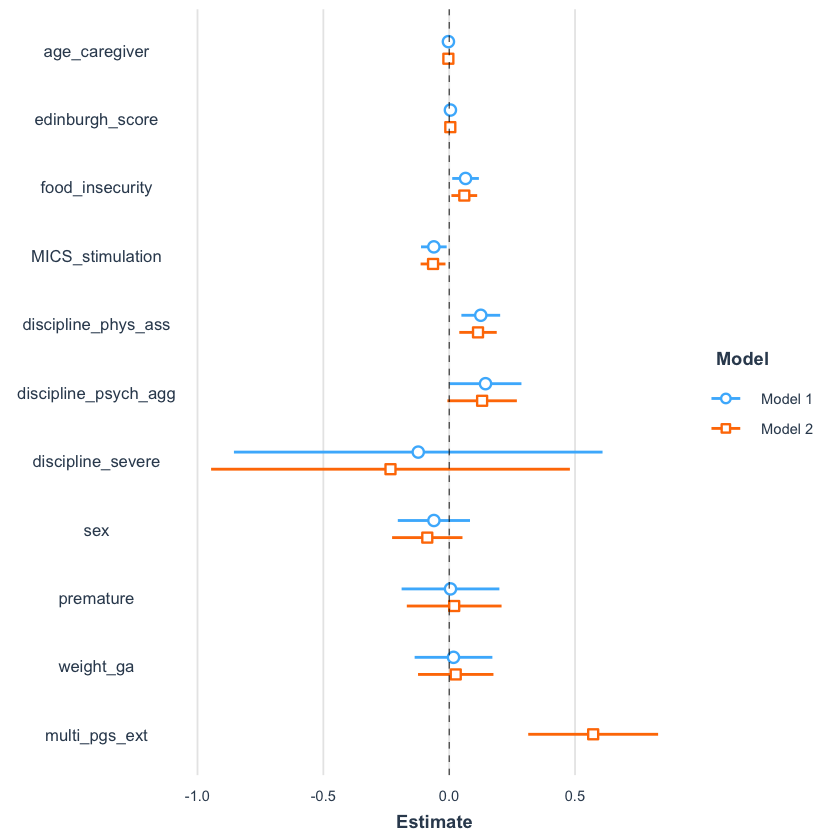

In [239]:
plot_summs(fit, fit_dna)

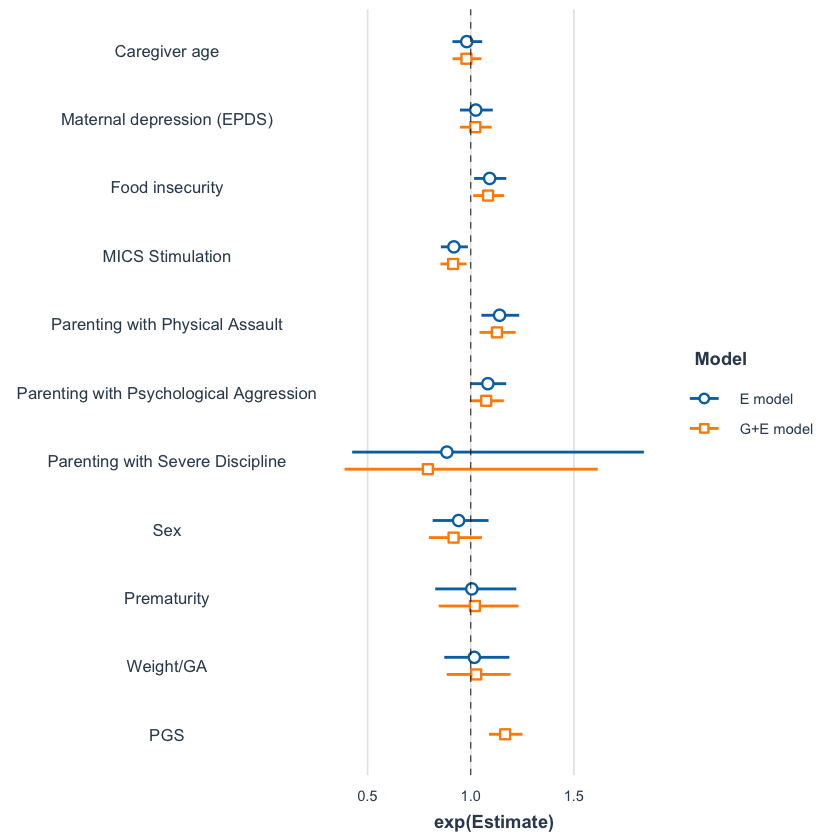

In [256]:
plot_summs(fit, fit_dna, scale = TRUE, exp = TRUE, model.names = c("E model", "G+E model"), 
colors = c("#0072B2", "darkorange"), coefs = coefs, null.line = FALSE)

ggsave("/Users/drt65393/Documents/ge-externalizing.png", width = 10, height = 8, dpi = 300)

In [234]:
fit_dna_int <- glm.nb(intern_problems ~ ., data = data_dna_int) # fit regression model  
summary(fit_dna_int)


Call:
glm.nb(formula = intern_problems ~ ., data = data_dna_int, init.theta = 1.507516183, 
    link = log)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept)            0.994938   0.518791   1.918   0.0551 .
age_caregiver         -0.005944   0.009156  -0.649   0.5162  
edinburgh_score        0.007505   0.012621   0.595   0.5521  
edu_caregiver          0.104243   0.087845   1.187   0.2354  
food_insecurity        0.041755   0.042907   0.973   0.3305  
MICS_stimulation      -0.034168   0.040713  -0.839   0.4013  
discipline_nonviolent  0.036065   0.066995   0.538   0.5903  
discipline_phys_ass    0.095334   0.063236   1.508   0.1317  
discipline_psych_agg   0.138669   0.114918   1.207   0.2276  
discipline_severe      0.049758   0.563041   0.088   0.9296  
sum_bhq               -0.010119   0.015753  -0.642   0.5206  
sex                    0.024533   0.114091   0.215   0.8297  
premature              0.193248   0.148958   1.297   0.1945  
weight_g

In [235]:
fit_int <- glm.nb(intern_problems ~ . -multi_pgs_int, data = data_dna_int) # fit regression model  
summary(fit_int)


Call:
glm.nb(formula = intern_problems ~ . - multi_pgs_int, data = data_dna_int, 
    init.theta = 1.465168277, link = log)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept)            0.918850   0.523147   1.756   0.0790 .
age_caregiver         -0.006359   0.009228  -0.689   0.4908  
edinburgh_score        0.003531   0.012649   0.279   0.7801  
edu_caregiver          0.101814   0.088696   1.148   0.2510  
food_insecurity        0.045872   0.043306   1.059   0.2895  
MICS_stimulation      -0.030650   0.040974  -0.748   0.4544  
discipline_nonviolent  0.046072   0.067540   0.682   0.4951  
discipline_phys_ass    0.106694   0.063372   1.684   0.0923 .
discipline_psych_agg   0.122038   0.115528   1.056   0.2908  
discipline_severe      0.114312   0.567436   0.201   0.8403  
sum_bhq               -0.005633   0.015827  -0.356   0.7219  
sex                    0.016901   0.114968   0.147   0.8831  
premature              0.192354   0.150132   1.281   0

In [149]:
sjPlot::tab_model(fit_int, fit_dna_int,
    pred.labels = c("Intercept", "Caregiver age", "Maternal depression (EPDS)", 
    "Caregiver education", "Food Insecurity",  "MICS Stimulation", "Positive Parenting",
    "Parenting with Physical Assault", "Parenting with Psychological Aggression", 
    "Parenting with Severe Discipline", 
    "Broken Homes Questionnaire", "Sex",
    "Prematurity", "Weight/GA", "Multi-PGS"),
    dv.labels = "Internalizing problems",
    file = "/Users/drt65393/Documents/Doc/TESE/tabelas/env_internalizing_dna.html")

In [251]:
summary(fit_dna_int)


Call:
glm.nb(formula = intern_problems ~ ., data = data_dna_int, init.theta = 1.507516183, 
    link = log)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept)            0.994938   0.518791   1.918   0.0551 .
age_caregiver         -0.005944   0.009156  -0.649   0.5162  
edinburgh_score        0.007505   0.012621   0.595   0.5521  
edu_caregiver          0.104243   0.087845   1.187   0.2354  
food_insecurity        0.041755   0.042907   0.973   0.3305  
MICS_stimulation      -0.034168   0.040713  -0.839   0.4013  
discipline_nonviolent  0.036065   0.066995   0.538   0.5903  
discipline_phys_ass    0.095334   0.063236   1.508   0.1317  
discipline_psych_agg   0.138669   0.114918   1.207   0.2276  
discipline_severe      0.049758   0.563041   0.088   0.9296  
sum_bhq               -0.010119   0.015753  -0.642   0.5206  
sex                    0.024533   0.114091   0.215   0.8297  
premature              0.193248   0.148958   1.297   0.1945  
weight_g

In [ ]:
coefs2 = c(
    "Caregiver age" = "age_caregiver",
    "Maternal depression (EPDS)" = "edinburgh_score",
    "Caregiver education" = "edu_caregiver",
    "Food insecurity" = "food_insecurity",
    "MICS Stimulation" = "MICS_stimulation",
    "Parenting with no violent discipline" = "discipline_nonviolent",
    "Parenting with Physical Assault" = "discipline_phys_ass",
    "Parenting with Psychological Aggression" = "discipline_psych_agg",
    "Parenting with Severe Discipline" = "discipline_severe", 
    "Broken Homes Questionairee" = "sum_bhq",
    "Sex" = "sex",
    "Prematurity" = "premature", 
    "Weight/GA" = "weight_ga", "PGS" = 
    "multi_pgs_int"
  )

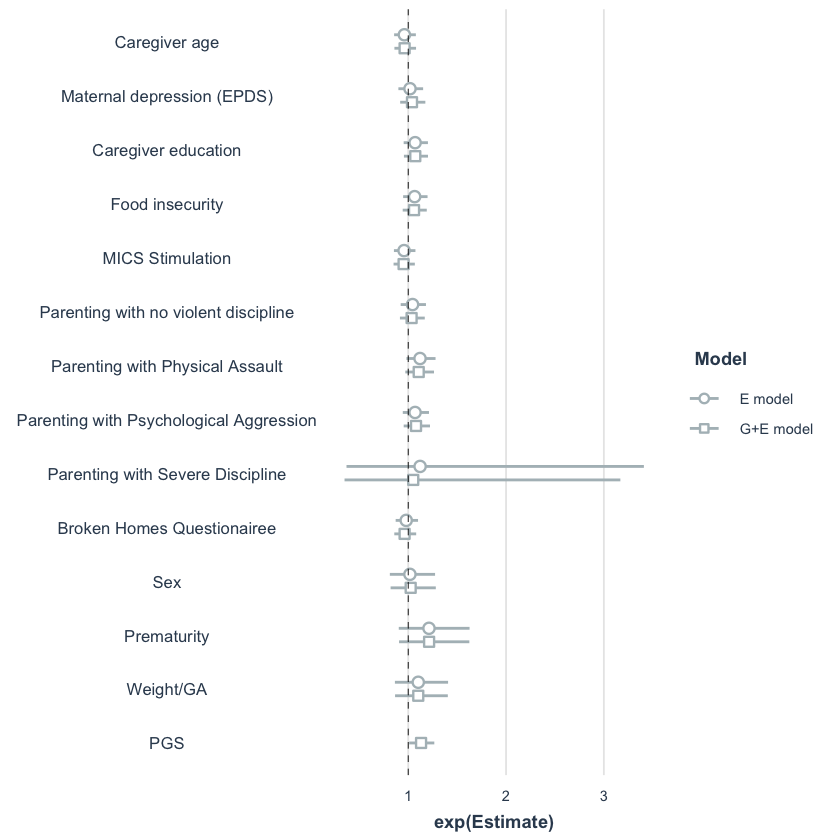

In [257]:
plot_summs(fit_int, fit_dna_int, scale = TRUE, exp = TRUE, model.names = c("E model", "G+E model"), 
colors = c("#b0bdc1", "#b0bdc1"), coefs = coefs2, null.line = FALSE)

ggsave("/Users/drt65393/Documents/ge-internalizing.png", width = 10, height = 8, dpi = 300)